In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import calendar
import datetime

In [2]:
header = {}
data = []

with open('data.csv', 'r') as fp:
    csv_reader = csv.DictReader(fp, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            header.update(row)
        data.append(row)

In [3]:
date = data[0]['date']
date.split('-')

['2015', '01', '02']

In [4]:
years = [2015, 2016, 2017, 2018, 2019]

In [5]:
cal = calendar.Calendar()
dates = [cal.yeardatescalendar(i) for i in years]
counts = {}

week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_count = np.zeros(7)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Feb', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_count = np.zeros(12)

for row in data:
    date = row['date']
    year, month, day = date.split('-')
    year, month, day = int(year), int(month), int(day)
    
    weekday = calendar.weekday(year, month, day)
    week_count[weekday] += 1
    month_count[month - 1] += 1
    counts.setdefault(datetime.date(year, month, day), 0)
    counts[datetime.date(year, month, day)] += 1

for year in dates:
    for season in year:
        for month in season:
            for week in month:
                for date in week:
                    record = list(counts.keys())
                    if date < np.max(record):
                        counts.setdefault(date, 0)

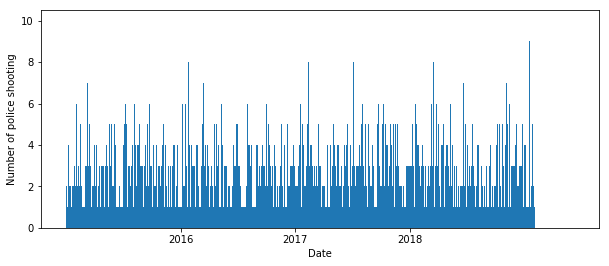

In [6]:
ds = list(counts.keys())
ds.index(datetime.date(2016, 1, 1))

plt.bar(np.arange(len(ds)), counts.values(), 1.0)
index = [ds.index(datetime.date(year, 1, 1)) for year in [2016, 2017, 2018]]
plt.xticks(index, ['2016', '2017', '2018'])
plt.xlabel('Date')
plt.ylabel('Number of police shooting')

fig = plt.gcf()
fig.set_size_inches(10, 4)

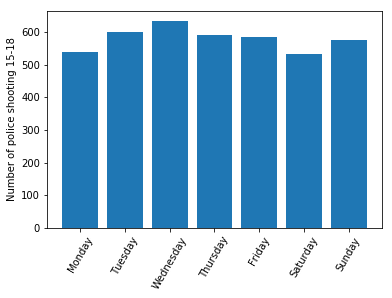

In [7]:
plt.bar(week_days, week_count, 0.8)
plt.xticks(rotation=60)
plt.ylabel('Number of police shooting 15-18')
plt.show()

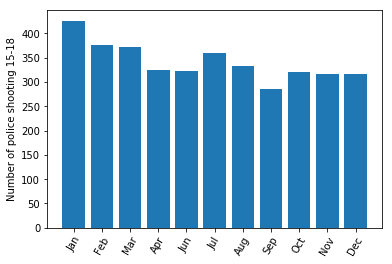

In [8]:
plt.bar(month_names, month_count, 0.8)
plt.xticks(rotation=60)
plt.ylabel('Number of police shooting 15-18')
plt.show()

In [9]:
num = np.array(list(counts.values()))
k = np.mean(num)

In [10]:
from scipy.stats import poisson

In [11]:
x = np.arange(np.max(num))
poi = poisson.pmf(x, k) * len(num)

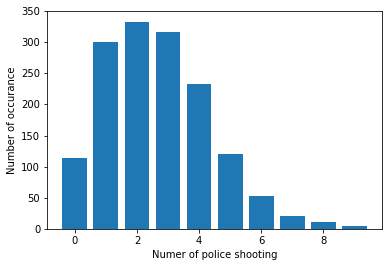

(array([114., 301., 333., 317., 233., 121.,  53.,  21.,  11.,   5.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), <a list of 10 Patch objects>)


In [12]:
hist = plt.hist(num, rwidth=0.8, align='left')
plt.xlabel(r"Numer of police shooting")
plt.ylabel(r"Number of occurance")
plt.show()
print(hist)

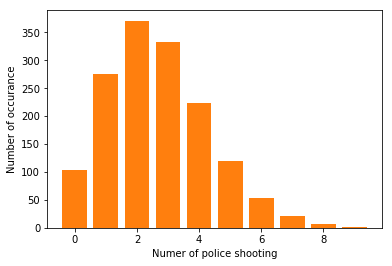

In [13]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.xlabel(r"Numer of police shooting")
plt.ylabel(r"Number of occurance")
plt.bar(np.arange(len(poi)), poi, color=colors[1])
plt.show()

In [14]:
counts_2015 = dict((k, v) for k, v in counts.items() if k.year == 2015)
counts_2016 = dict((k, v) for k, v in counts.items() if k.year == 2016)
counts_2017 = dict((k, v) for k, v in counts.items() if k.year == 2017)
counts_2018 = dict((k, v) for k, v in counts.items() if k.year == 2018)
counts_2019 = dict((k, v) for k, v in counts.items() if k.year == 2019)
counts = dict((k, v) for k, v in counts.items() if k.year < 2019)
counts_monday = dict((k, v) for k, v in counts.items() if calendar.weekday(k.year, k.month, k.day) == 0)
counts_wednesday = dict((k, v) for k, v in counts.items() if calendar.weekday(k.year, k.month, k.day) == 2)
counts_tuesday = dict((k, v) for k, v in counts.items() if calendar.weekday(k.year, k.month, k.day) == 1)

In [15]:
def draw_hist(counts):
    num = np.array(list(counts.values()))
    plt.xlabel(r"Numer of police shooting")
    plt.ylabel(r"Number of occurance")
    hist = plt.hist(num, range(10), rwidth=0.8, align='left')
    plt.show()
    print(hist)

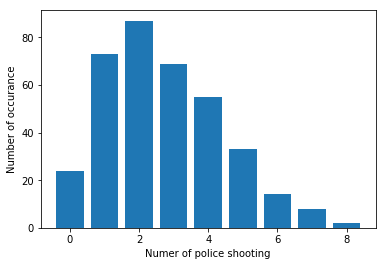

(array([24., 73., 87., 69., 55., 33., 14.,  8.,  2.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


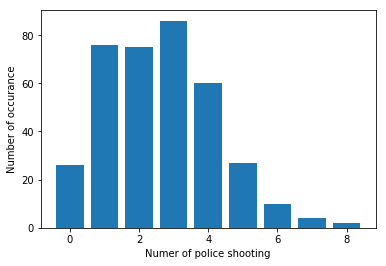

(array([26., 76., 75., 86., 60., 27., 10.,  4.,  2.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


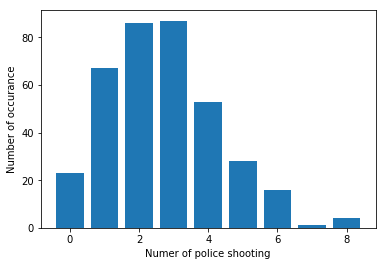

(array([23., 67., 86., 87., 53., 28., 16.,  1.,  4.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


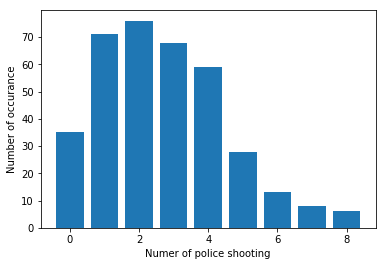

(array([35., 71., 76., 68., 59., 28., 13.,  8.,  6.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


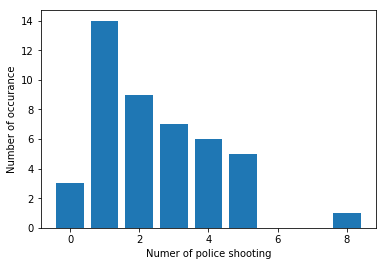

(array([ 3., 14.,  9.,  7.,  6.,  5.,  0.,  0.,  1.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


In [16]:
draw_hist(counts_2015)
draw_hist(counts_2016)
draw_hist(counts_2017)
draw_hist(counts_2018)
draw_hist(counts_2019)

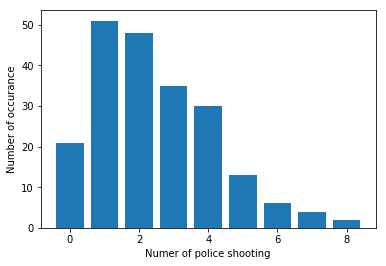

(array([21., 51., 48., 35., 30., 13.,  6.,  4.,  2.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


In [17]:
draw_hist(counts_monday)

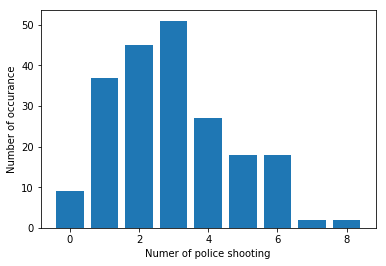

(array([ 9., 37., 45., 51., 27., 18., 18.,  2.,  2.]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Patch objects>)


In [18]:
draw_hist(counts_wednesday)

In [19]:
lam = 2.699
z = 3.220
n = 1461

m = np.arange(len(counts_2019.items()))

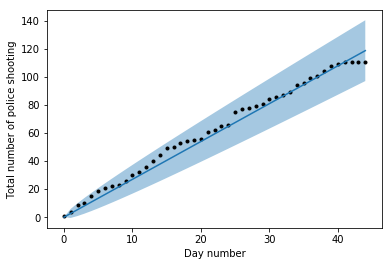

In [29]:
y = lam * m
err = z * np.sqrt(m + m**2 / n)

cum = [0]
for k, v in counts_2019.items():
    cum.append(cum[-1] + v)

plt.plot(m, y)
plt.fill_between(m, y + err, y - err, alpha=0.4)
plt.scatter(m, cum[1:], marker='.', color='k')
plt.xlabel("Day number")
plt.ylabel("Total number of police shooting")
plt.show()